In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import *
from sklearn.metrics import roc_auc_score

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
N=26500

In [3]:
data = pd.read_csv('./Xtrain_challenge_owkin.csv',nrows=N)
data=data.drop('Ids', axis=1)
data=data.values
y = pd.read_csv('./challenge_output_data_training_file_disease_prediction_from_dna_data.csv',nrows=N,sep=';')
y=y.drop('Ids', axis=1)
y=y.values
 ## maybe concatenate the SNPs ?

# Should be paire 2 by 2 ? Careful to onehot

In [4]:
#dataAgg=data.astype('str')
#dataAggOdd=dataAgg[:, 0::2]
#dataAggEven=dataAgg[:, 1::2]
#dataAgg=np.core.defchararray.add(dataAggOdd,dataAggEven)
#dataAgg=dataAgg.astype(np.uint8)


In [5]:
#my_dict = {1:1, 0:0, 11:3, 10:2}
#dataAgg=np.vectorize(my_dict.get)(dataAgg)

In [6]:
#dataAggHot=(np.arange(dataAgg.max()) == dataAgg[...,None]-1).astype(int)

In [7]:
#dataAggHot=np.reshape(np.ravel(dataAggHot), (N, 54372))

In [8]:
#meanH=dataAggHot.mean()
#stdH=dataAggHot.std()
#dataAggHot=(dataAggHot-meanH)/stdH
#x_trainH, x_testH, y_trainH, y_testH = train_test_split(dataAggHot,y.ravel(),test_size=0.2,train_size=0.8,random_state=777)
#print("Size of training set = "+str(len(x_trainH)))
#print("Size of test set = "+str(len(x_testH)))

# Nope ?

In [9]:
mean=data.mean()
std=data.std()
data=(data-mean)/std
x_train, x_test, y_train, y_test = train_test_split(data,y.ravel(),test_size=0.2,train_size=0.8,random_state=777)
print("Size of training set = "+str(len(x_train)))
print("Size of test set = "+str(len(x_test)))

Size of training set = 21200
Size of test set = 5300


In [10]:
w=36248

In [11]:
#svm_rbf = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
#svm_lin = svm.SVC(kernel='linear', C=1e3)
#svm_poly = svm.SVC(kernel='poly', C=1e3, degree=2)
#y_rbf = svm_rbf.fit(x_train, y_train).predict(x_test)
#y_lin = svm_lin.fit(x_train, y_train).predict(x_test)
#y_poly = svm_poly.fit(x_train, y_train).predict(x_test)

In [12]:
#print(roc_auc_score(y_test,y_rbf))
#print(roc_auc_score(y_test,y_lin))
#print(roc_auc_score(y_test,y_poly))

In [13]:
#print(accuracy_score(y_test,y_rbf))
#print(accuracy_score(y_test,y_lin))
#print(accuracy_score(y_test,y_poly))

In [14]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3, 1,10],
                     'C': [1e-3,1e-2,1e-1,1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1e-3,1e-2,1e-1,1, 10, 100, 900,1000,1100,1200]}]


#clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5)
#clf.fit(x_train, y_train.ravel())
#print(clf.best_params_)
#y_true, y_pred = y_test, clf.predict(x_test)
#print(accuracy_score(y_true,y_pred))

# Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# use a full grid over all parameters
clf = RandomForestClassifier(n_estimators=200)
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 5,10,20],
              "min_samples_leaf": [1, 3, 5,10,20],
              "bootstrap": [True],
              "criterion": ["gini"]}
#grid_search = GridSearchCV(clf, param_grid=param_grid)
#grid_search.fit(x_train, y_train.ravel())
#print(grid_search.best_params_)
#y_true, y_pred = y_test, grid_search.predict(x_test)
#print(accuracy_score(y_true,y_pred))

# One H data

In [17]:
# use a full grid over all parameters
clf = RandomForestClassifier(n_estimators=200)
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 5,10,20],
              "min_samples_leaf": [1, 3, 5,10,20],
              "bootstrap": [True],
              "criterion": ["gini"]}
#grid_search = GridSearchCV(clf, param_grid=param_grid)
#grid_search.fit(x_trainH, y_train.ravel())
#print(grid_search.best_params_)
#y_true, y_pred = y_test, grid_search.predict(x_testH)
#print(accuracy_score(y_true,y_pred))

In [18]:
#svm_rbf = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
#svm_lin = svm.SVC(kernel='linear', C=1e3)
#svm_poly = svm.SVC(kernel='poly', C=1e3, degree=2)
#y_rbf = svm_rbf.fit(x_trainH, y_train).predict(x_testH)
#y_lin = svm_lin.fit(x_trainH, y_train).predict(x_testH)
#y_poly = svm_poly.fit(x_trainH, y_train).predict(x_testH)

In [19]:
#print(accuracy_score(y_test,y_rbf))
#print(accuracy_score(y_test,y_lin))
#print(accuracy_score(y_test,y_poly))

In [20]:
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1,1e-2,1e-3, 1,10],
#                     'C': [1e-3,1e-2,1e-1,1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1e-3,1e-2,1e-1,1, 10, 100, 900,1000,1100,1200]}]#


#clf = GridSearchCV(svm.SVC(C=1), tuned_parameters, cv=5)
#clf.fit(x_trainH, y_train.ravel())
#print(clf.best_params_)
#y_true, y_pred = y_test, clf.predict(x_testH)
#print(accuracy_score(y_true,y_pred))

# Deep ?

In [21]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Input, Flatten, Dropout, Merge
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.optimizers import Adam

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
x_train_t, x_val, y_train_t, y_val = train_test_split(x_train,y_train.ravel(),test_size=0.2,train_size=0.8,random_state=777)

t,_=x_train_t.shape

x_train_t=np.reshape(x_train_t,(t, 36248,1))
y_train_t=np.reshape(y_train_t,(t, 1))

t,_=x_val.shape
x_val=np.reshape(x_val,(t, 36248,1))
y_val=np.reshape(y_val,(t, 1))

In [23]:


conv = Sequential()
conv.add(Conv1D(20, 4, input_shape = x_train_t.shape[1:3], activation = 'relu'))
conv.add(Conv1D(20, 4, input_shape = x_train_t.shape[1:3], activation = 'relu'))
conv.add(Conv1D(20, 4, input_shape = x_train_t.shape[1:3], activation = 'relu'))
conv.add(MaxPooling1D(2))
conv.add(Dropout(0.5))
conv.add(Conv1D(20, 4, input_shape = x_train_t.shape[1:3], activation = 'relu'))
conv.add(MaxPooling1D(10))

conv.add(Flatten())
conv.add(Dense(1000, activation = 'sigmoid'))
conv.add(Dense(500, activation = 'sigmoid'))
conv.add(Dropout(0.5))
conv.add(Dense(200, activation = 'sigmoid'))
conv.add(Dense(60, activation = 'sigmoid'))
conv.add(Dense(1, activation = 'sigmoid'))

In [24]:
conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 36245, 20)         100       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 36242, 20)         1620      
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 36239, 20)         1620      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 18119, 20)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18119, 20)         0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 18116, 20)         1620      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1811, 20)          0         
__________

In [25]:

conv.compile(Adam(lr=1e-5),loss='binary_crossentropy', \
                            metrics=['acc'])

In [26]:
from keras.callbacks import ModelCheckpoint

In [27]:

## Create checkpoint that saves the weights each time validation set at each epoch is outperformed by the last one## Creat 
filepath="weights_besty Dense.hdf5"
checkpoint = ModelCheckpoint(filepath, \
                             monitor="val_acc", \
                             verbose=1, \
                             save_best_only=True, \
                             mode="max")
callbacks_list = [checkpoint]

In [28]:
history = conv.fit(x_train_t, y_train_t, \
                    validation_data=(x_val, y_val), \
                    epochs=50, \
                    batch_size=8, \
                    callbacks=callbacks_list, \
                    verbose=1)

Train on 16960 samples, validate on 4240 samples
Epoch 1/50
16960/16960 [==============================] - 649s 38ms/step - loss: 0.6867 - acc: 0.5623 - val_loss: 0.6840 - val_acc: 0.5717

Epoch 00001: val_acc improved from -inf to 0.57170, saving model to weights_besty Dense.hdf5
Epoch 2/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.6860 - acc: 0.5623 - val_loss: 0.6829 - val_acc: 0.5717

Epoch 00002: val_acc did not improve from 0.57170
Epoch 3/50
16960/16960 [==============================] - 649s 38ms/step - loss: 0.6855 - acc: 0.5623 - val_loss: 0.6826 - val_acc: 0.5717

Epoch 00003: val_acc did not improve from 0.57170
Epoch 4/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.6838 - acc: 0.5623 - val_loss: 0.6785 - val_acc: 0.5717

Epoch 00004: val_acc did not improve from 0.57170
Epoch 5/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.6630 - acc: 0.5966 - val_loss: 0.6354 - val_acc: 0.6825

Epoch 00


Epoch 00041: val_acc did not improve from 0.71415
Epoch 42/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.1475 - acc: 0.9556 - val_loss: 0.8594 - val_acc: 0.6724

Epoch 00042: val_acc did not improve from 0.71415
Epoch 43/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.1334 - acc: 0.9604 - val_loss: 0.8772 - val_acc: 0.6844

Epoch 00043: val_acc did not improve from 0.71415
Epoch 44/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.1211 - acc: 0.9637 - val_loss: 0.9026 - val_acc: 0.6748

Epoch 00044: val_acc did not improve from 0.71415
Epoch 45/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.1083 - acc: 0.9698 - val_loss: 0.9270 - val_acc: 0.6882

Epoch 00045: val_acc did not improve from 0.71415
Epoch 46/50
16960/16960 [==============================] - 648s 38ms/step - loss: 0.0982 - acc: 0.9729 - val_loss: 0.9473 - val_acc: 0.6800

Epoch 00046: val_acc did not improve from 0.

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [30]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

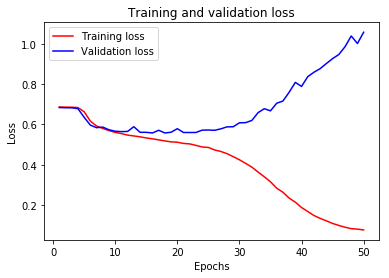

In [32]:

history_dicthistory_  = history.history
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

num_epochs = 50
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_loss_values, 'r', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

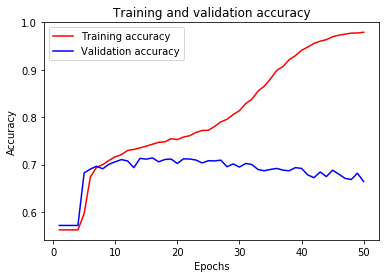

In [33]:

history_dicthistory_  = history.history
train_acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

num_epochs = 50
epochs = range(1, num_epochs + 1)

plt.plot(epochs, train_acc_values, 'r', label="Training accuracy")
plt.plot(epochs, val_acc_values, 'b', label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [36]:

t,_=x_test.shape

x_test=np.reshape(x_test,(t, 36248,1))

In [37]:
y_pred=conv.predict(x_test, verbose=1)

5300/5300 [==============================] - 36s 7ms/step


In [38]:
datat_temp  = pd.read_csv('./Xtest_challenge_owkin.csv')
datat=datat_temp.drop('Ids', axis=1)
datat=datat.values
datat=(datat-mean)/std
t,_=datat.shape
x_test_no_answer=np.reshape(datat,(t, 36248,1))

In [40]:
y_pred=conv.predict(x_test_no_answer, verbose=1)

13250/13250 [==============================] - 98s 7ms/step


In [41]:
np.savetxt('pred conv +dense no penalty',y_pred)